# Let's compare the electricity average retail prices in restructured and not restructured states

# We will use the data from State Electricity Profiles available at: https://www.eia.gov/electricity/state/

In [10]:
import pandas as pd
import numpy as np
df_states = pd.read_excel(io="StatesData2020.xlsx",sheet_name="Data")
df_states.head(5)

,Name,Average retail price (cents/kWh),Net summer capacity (MW),Net generation (MWh),Total retail sales (MWh),Restructured
0,Alabama,9.84,28739,137542702,83395605,No
1,Alaska,19.82,2767,6276441,5917577,No
2,Arizona,10.44,27115,109305057,81960074,No
3,Arkansas,8.32,14835,54641259,45851003,Yes
4,California,18.00,78055,193074930,250174672,Yes


In [11]:
df_states.columns

Index(['Name', 'Average retail price (cents/kWh)', 'Net summer capacity (MW)',
       'Net generation (MWh)', 'Total retail sales (MWh)', 'Restructured'],
      dtype='object')

In [12]:
df_restructured = df_states[(df_states.Restructured=="Yes")]

In [17]:
df_restructured.head(5)

,Name,Average retail price (cents/kWh),Net summer capacity (MW),Net generation (MWh),Total retail sales (MWh),Restructured
3,Arkansas,8.32,14835,54641259,45851003,Yes
4,California,18.00,78055,193074930,250174672,Yes
6,Connecticut,19.13,10276,41190572,27113673,Yes
7,Delaware,10.24,3372,5205372,11129051,Yes
8,District of Columbia,11.90,42,201104,9785775,Yes


In [15]:
df_notrestructured = df_states[(df_states.Restructured=="No")]

In [16]:
df_notrestructured.head(5)

,Name,Average retail price (cents/kWh),Net summer capacity (MW),Net generation (MWh),Total retail sales (MWh),Restructured
0,Alabama,9.84,28739,137542702,83395605,No
1,Alaska,19.82,2767,6276441,5917577,No
2,Arizona,10.44,27115,109305057,81960074,No
5,Colorado,10.27,17632,54115011,56050264,No
9,Florida,10.06,61833,250827799,242440171,No


In [21]:
Restructured_mean = df_restructured['Average retail price (cents/kWh)'].mean()
Restructured_std = df_restructured['Average retail price (cents/kWh)'].std()
NotRestructured_mean = df_notrestructured['Average retail price (cents/kWh)'].mean()
NotRestructured_std = df_notrestructured['Average retail price (cents/kWh)'].std()

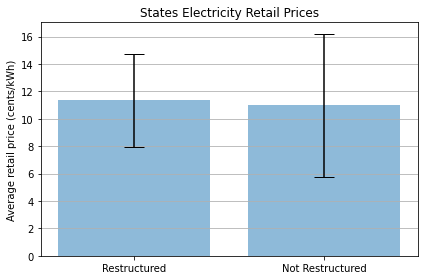

In [22]:
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
labels = ['Restructured', 'Not Restructured']
x_pos = np.arange(len(labels))
Prices = [Restructured_mean, NotRestructured_mean]
error = [Restructured_std, NotRestructured_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Prices,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average retail price (cents/kWh)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('States Electricity Retail Prices')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()